In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_51849/921116893.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from generate_corpora import corpus_from_json
from analysis import *

In [3]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("simple", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)

grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")
# wilcox et al analyses are in other notebook
island_effects = pd.DataFrame(grnn_cnp_island_effects + gpt2_cnp_island_effects + all_island_effects)
all_island_surprisals = pd.DataFrame(all_island_surprisals)

In [4]:
pd.DataFrame(all_island_effects)['condition'].value_counts()

condition
island    49572
simple     5508
Name: count, dtype: int64

In [5]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(island_effects)
island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'GPT2 Filler Effects')

<Figure size 4000x2200 with 0 Axes>

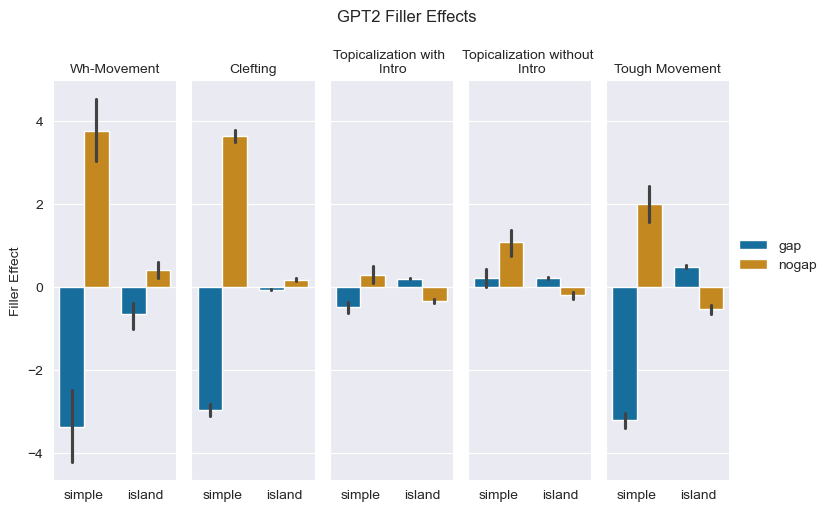

In [6]:
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GPT2 Filler Effects", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

<Figure size 2400x1500 with 0 Axes>

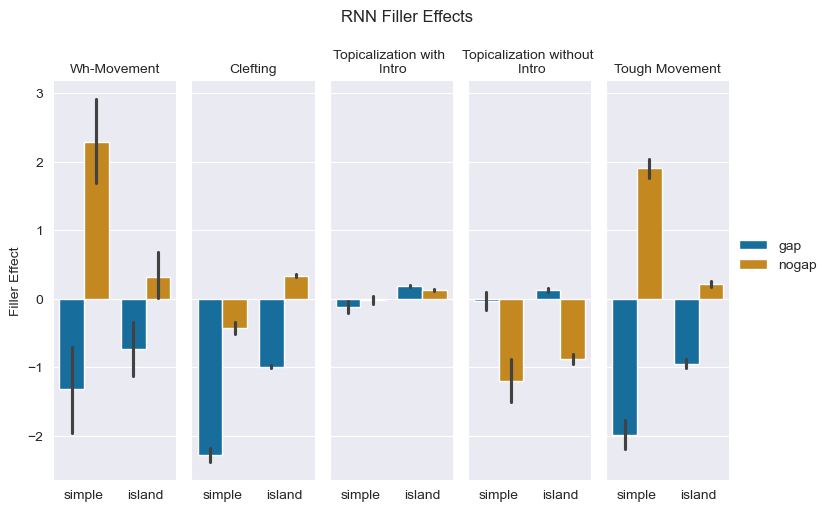

In [8]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("RNN Filler Effects", y = 1.05)
plt.savefig("figures/grnn_expt1.png")

In [68]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -36379.507 	 AIC: 72781.013

Random effects:

                 Name    Var    Std
item      (Intercept)  7.352  2.712
item.1            gap  3.480  1.866
Residual               0.671  0.819

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -36379.507 	 AIC: 72781.013

Random effects:

                 Name    Var    Std
item      (Intercept)  7.352  2.712
item.1            gap  3.480  1.866
Residual               0.671  0.819

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: g

In [69]:
pd.DataFrame(effects).reset_index()[['Estimate', 'P-val', 'model', 'condition']]

,Estimate,P-val,model,condition
0,0.532,0.000,grnn,cleft
1,0.165,0.012,grnn,intro_topic
2,-0.164,0.374,grnn,nointro_topic
3,2.736,0.000,grnn,tough
4,6.388,0.000,gpt2,cleft
5,1.322,0.000,gpt2,intro_topic
6,1.273,0.000,gpt2,nointro_topic
7,6.245,0.000,gpt2,tough
